# issue 8 -- Make it so that gwylm(..,pad=pad_amount,..) pads using its pad method rather than a adding lower level pad methods to its load function

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from nrutils import scsearch,gwylm,physf,physhf
from nrutils.analyze.match import match as match_object
from nrutils.core.units import *
from kerr import *
from matplotlib.pyplot import *
from numpy import array,pi

(positive)>> Applying custom matplotlib settings.


In [2]:
# Find simulation
a = scsearch(keyword='hrq',q=1,verbose=True)[0]

(scsearch)>> Found keyword (=hrq) keyword.
(scsearch)>> Found q (=1) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][bradwr] HRq-series: ns-q1.00	(D9_q1.0_a0.0_m160)



In [12]:
# Load data with and without pad option
u = gwylm(a,lm=(2,2),clean=True,verbose=True,pad=500)
v = gwylm(a,lm=(2,2),clean=True,verbose=True,pad=0)

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.15) keyword.
(gwylm)>> Found lm (=(2, 2)) keyword.
(gwylm)>> Found pad (=500) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x1139c5560>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(gwylm)>> The (extraction_parameter,level) is (75.0,None), which differs from the config values of (75,0). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2)]
(load)>> Loading: mp_WeylScal4::Psi4i_l2_m2_r75.00.asc
(load)>> Padding wfarr. The old data length was 6660, and the new one is 7160
(pad_wfarr)>> The shape was (6660, 3). Now the shape is (7160, 3).
(gwylm)>> Storing w22 from a PN estimate[see pnw0 in basics.py, and/or arxiv:1310.1528v4]. This will be the frequency parameter used if strain is to be calculated.
(calcflm)>> w0(w22) = 0.05809

In [13]:
# Ringdown is of particular interest
ur = u.ringdown(20,T1=1000)
vr = v.ringdown(20,T1=1000)

(ringdown)>> Time will be listed relative to the peak of strain.
(gwylm.ringdown!)>> Input value of T1=1000 extends beyond the end of the waveform. We will stop at the last value of the waveform, not at the requested T1.
(ringdown)>> Time will be listed relative to the peak of strain.
(gwylm.ringdown!)>> Input value of T1=1000 extends beyond the end of the waveform. We will stop at the last value of the waveform, not at the requested T1.


([<matplotlib.axes._subplots.AxesSubplot at 0x116ded690>,
 <matplotlib.figure.Figure at 0x116df6a90>)

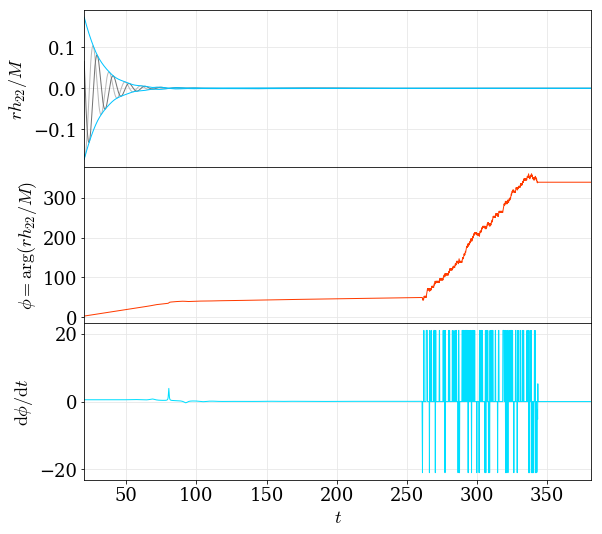

In [16]:
ur.lm[2,2]['strain'].plot()

In [34]:
vr.pad(1000)
lim(vr.t)

(pad_wfarr@243!)>> The desired new length is <= the current array length (i.e. number of time domain points). Nothing will be padded.


ValueError: [1m([31mpad_wfarr!![0m) [0mThe current length (5559) is not the desired new length(1000). This function has a bug.